# Step 1: Business Understanding

The goal is to firstly use clustering to determine the factors contributing to high customer complaints and then to use these factors to develop a multi classification model to predict the likelihood of a specific FG being returned.

# Step 2: Analytical Approach

 ### 2.1. Analytical Approach: 
 K modes algorithm will be used since we are working with categorical variables. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means as with K means which is used for numerical values. KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means. But for categorical data points, we cannot calculate the distance 
 
***********************************************************************
Read: https://www.analyticssteps.com/blogs/5-clustering-methods-and-applications

For numerical data the options are:
1) Centroid/Partion based clustering e.g K modes, CLARANS (Clustering Large Applications based upon Randomized Search)
2) Density based clustering e.g. DBSCAN (Density-based Spatial Clustering of Applications with Noise),OPTICS (Ordering Points to Identify Clustering Structure)
3) Distribution/Model based clustering
4) Hierarchial clustering e.g. BIRCH (Balanced Iterative Reducing Clustering and using Hierarchies), CURE (Clustering Using Representatives)
5) Grid based clustering e.g. STING (Statistical Information Grid), Wave cluster, CLIQUE (Clustering In Quest)

For categorical data the options are:
1) Centroid/Partition based clustering e.g. K modes


For Mixed dataset (categorical and numerical): 
Read : https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
1) Centroid/Partion based clustering e.g. Partitioning Around Medoids (PAM) using Gowers distance, K-prototypes alogorithm (mixed of kmodes and kmeans algorithm), numerically encode categorical data e.g with one hot encoding before using a numerical method like k-means or DBSCAN
2) Dimensional Reduction e.g. Factorial analysis of mixed data (FAMD), Uniform manifold approximation and projection for dimensional reduction (UMAP)
3) Hierarchial Clustering and Gowers distance
 
 ### 2.2. Data Requirements: 
 Require customer returns data from call centre showing various factors that are attributed to returned   goods    
 ### 2.3. Data Collection: 
 Data will be collected from KP heat system
 ### 2.4. Data Attributes:
   1. Plnt - Plant that experienced customer returns
   2. SLoc - Storage location of item
   3. Name 1 - Description of customer
   4. Description - Nature of customer complaint
   5. Material - Material complaint logged on
   6. Volume - Packsize of material FG
   7. City - City of supplier
   8. RSM - Sales managers
   9. SFG - Semi-finished goods
   10. StreamDescription - manufacturing stream description
   11. StockedStatus - MTS or MTO batches
   12. StockParetoABC - ABC category designation
   13. ProductBusinessUnit - Sales category according to business unit
   14. ProductSalesCategory - Sales Category
   15. FamilyHierarchyL3 - Further supply chain description
 

### 2.4. Data Understanding (Exploratory Data Analysis/Descriptive statistics/data visualization)

In [1]:
# Read the dataset

import pandas as pd  
pd.set_option('display.max_columns', None) 
df_returns = pd.read_excel('SA Returns Jan 2020 to March 2023.xlsx') 
df_returns

,Plnt,SLoc,Sold-to pt,Ship-to,Name 1,Created On,Time,Created By,OrdRs,Description,Sales Doc.,Item,Material,Batch,Order Quantity,SU,Net value,Curr.,Gross weight,WUn,Volume,VUn,Delivery,Item.1,Ac.GI date,Batch.1,Delivery quantity,SU.1,Order,Manuf. Dte,SLED/BBD,City,Street,REP,RSM
0,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,80,OCC000001-0005,M193833796,3,EA,1100.34,ZAR,21.486,KG,15.0,L,84128534,10,2020-01-06,M193833796,3,EA,200000078881,2019-10-15,2029-10-13,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet
1,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,170,GTC000001-0005,M193333176,4,EA,1142.08,ZAR,21.400,KG,20.0,L,84128534,20,2020-01-06,M193333176,4,EA,200000077607,2019-09-17,2025-09-16,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet
2,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,180,GTC000001-0001,M193333176,5,EA,389.30,ZAR,5.600,KG,5.0,L,84128534,30,2020-01-06,M193333176,5,EA,200000077606,2019-09-16,2025-09-15,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet
3,ZA13,CV01,105105,105105,Plascon Personnel Acc For Own Use,2020-01-06,09:10:19,KAFRIKA,12,Incorrectly ordered by customer,60672244,10,TCR000002-0020,L194450935,1,EA,573.30,ZAR,24.550,KG,20.0,L,84128535,10,2020-01-06,L194450935,1,EA,200000081354,2019-11-19,2025-11-18,Krugersdorp,10 Frederick Cooper Drive,50003405 - Mbali Malinga,50003405 - Mbali Malinga
4,ZA13,CV01,100348,100348,Wellington Paint & H/W Bi - 35667,2020-01-06,09:12:08,KAFRIKA,30,B/O no longer required,60672245,10,TDV001000-0049,L194050288,4,EA,796.28,ZAR,12.376,KG,9.0,L,84128536,10,2020-01-06,L194050288,4,EA,200000081593,2019-12-09,2029-12-07,Cape Town,33 Main Road,50001527 - Mark Walters,50001522 - Glen Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108277,ZA01,FA01,IC013,IC013,Sizwe Paints Pty Ltd - Deco,2023-03-31,13:08:40,CSEOPA,Z33,B/O no longer required,60981760,60,UC000001-0005,M223540888,4,EA,1141.16,ZAR,29.200,KG,20.0,L,84172831,20,2023-03-31,M223540888,4,EA,200000116801,2022-09-21,2028-09-20,Midrand,564 James Crescent,50000918 - Mikateko Maluleke,50000923 - Povendhiran Pillay
108278,ZA13,CV01,102998,102998,Buco Bergvliet - 1459,2023-03-31,13:58:09,MMORUBANE,Z20,Not to Spec: Colour,60981771,10,TWA001000-0020,L223567101,2,EA,2730.00,ZAR,50.182,KG,40.0,L,84172848,10,NaT,L223567101,2,EA,200000116893,2022-10-03,2032-10-01,Cape Town,151 Main Road,50001529 - Zeenat Mather,50001522 - Glen Martin
108279,ZA13,CV01,102998,102998,Buco Bergvliet - 1459,2023-03-31,14:10:22,MMORUBANE,Z03,Customer Error/over stock/not required,60981772,80,101801-7238,L230369072,1,EA,97.79,ZAR,2.200,KG,2.0,L,84172833,10,NaT,L230369072,1,EA,200000120077,2023-02-20,2029-02-18,Cape Town,151 Main Road,50001529 - Zeenat Mather,50001522 - Glen Martin
108280,ZA15,CV01,104497,104497,Game Mthatha - G085,2023-03-31,14:23:46,NNGCAI,Z03,Customer Error/over stock/not required,60981775,10,BBO000605-0020,L224267973,4,EA,3723.60,ZAR,103.740,KG,80.0,L,84172834,10,2023-03-31,L224267973,4,EA,200000118287,2022-11-02,2032-10-30,Mthatha,"Shop no 34, Mthatha Plaza",50000355 - Barend Venter,50003670 - Gerrie Stemmet


In [2]:
df_returns.dtypes

Plnt                         object
SLoc                         object
Sold-to pt                   object
Ship-to                      object
Name 1                       object
Created On           datetime64[ns]
Time                         object
Created By                   object
OrdRs                        object
Description                  object
Sales Doc.                    int64
Item                          int64
Material                     object
Batch                        object
Order Quantity                int64
SU                           object
Net value                   float64
Curr.                        object
Gross weight                float64
WUn                          object
Volume                      float64
VUn                          object
Delivery                      int64
Item.1                        int64
Ac.GI date           datetime64[ns]
Batch.1                      object
Delivery quantity             int64
SU.1                        

In [3]:
df_returns.shape

# the dataset has 35 columns and 108282 rows of data

(108282, 35)

In [4]:
pd.set_option('display.max_rows', None)
df_returns.describe()

,Sales Doc.,Item,Order Quantity,Net value,Gross weight,Volume,Delivery,Item.1,Delivery quantity,Order
count,1.082820e+05,108282.000000,108282.000000,108282.000000,108282.000000,108282.000000,1.082820e+05,108282.000000,108282.00000,1.082820e+05
mean,6.084491e+07,93.020511,4.423210,2213.489947,53.518828,41.934829,8.415433e+07,38865.011101,3.61869,1.999428e+11
std,8.139289e+04,219.004646,14.764265,7183.414415,189.739293,141.723835,1.180143e+04,182781.249139,13.74801,2.392188e+09
min,6.067224e+07,10.000000,0.000000,-0.060000,0.000000,0.000000,8.412853e+07,10.000000,0.00000,1.000000e+11
25%,6.078508e+07,20.000000,1.000000,336.830000,5.000000,5.000000,8.414574e+07,10.000000,1.00000,2.000001e+11
50%,6.084668e+07,50.000000,2.000000,749.790000,12.400000,10.000000,8.415512e+07,40.000000,1.00000,2.000001e+11
75%,6.091284e+07,110.000000,4.000000,1711.860000,36.260000,30.000000,8.416427e+07,100.000000,3.00000,2.000001e+11
max,6.098178e+07,5090.000000,1000.000000,410178.840000,12962.880000,8960.000000,8.417285e+07,900032.000000,1000.00000,2.000001e+11


In [5]:
pd.set_option('display.max_rows', 10)
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108282 entries, 0 to 108281
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Plnt               108282 non-null  object        
 1   SLoc               108136 non-null  object        
 2   Sold-to pt         108282 non-null  object        
 3   Ship-to            108282 non-null  object        
 4   Name 1             108282 non-null  object        
 5   Created On         108282 non-null  datetime64[ns]
 6   Time               108282 non-null  object        
 7   Created By         108282 non-null  object        
 8   OrdRs              108282 non-null  object        
 9   Description        108282 non-null  object        
 10  Sales Doc.         108282 non-null  int64         
 11  Item               108282 non-null  int64         
 12  Material           108282 non-null  object        
 13  Batch              83846 non-null   object  

In [6]:
# no trending required during clustering

# Step 3: Data Preparation

### 3.1. Dimensional Reduction: Feature Addition

In [7]:
# do feature addition first to ensure blanks are removed
# model can't work with blanks

In [8]:
# add the SFG and stream column to the existing dataframe

import pandas as pd
pd.set_option('display.max_rows', 5)
df2 = pd.read_excel('MasterProductionPlanning.xlsx')
df2.rename(columns = {'ProductCode':'Material'}, inplace = True)
df2

,Material,StockedStatus,StockParetoABC,ProductDescription,PackSizeVol,PackNettWeight,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Pallet,ShelfLife,Stream,StreamDescription
0,101002-2251,MTS,A,Pcell Pfilla Int. Crack Filler-12kg,12.000,12.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,60,NaN,ZA02_PP_PPO,Powder Manufacture
1,101002-7241,MTS,C,Pcell Pfilla Int. Crack Filler-20x500g,10.000,10.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,30,NaN,ZA02_PP_PPO,Powder Manufacture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,XZTC/25KG,MTS,Y,Xeracolour Zero Voc-Tr Yellow Oxide-25kg,18.724,24.99654,XZTC-HOC,1.335,ZA09,ZA09,COLOURANTS,COLOURANTS,24,NaN,ZA09_BM_HOC,Hockmeyer Basketmill
1751,XZTF/25KG,MTS,Y,Xeracolour Zero Voc-Tr Red Oxide-25kg,18.724,24.99654,XZTF-HOC,1.335,ZA09,ZA09,COLOURANTS,COLOURANTS,24,NaN,ZA09_BM_HOC,Hockmeyer Basketmill


In [9]:
# do a left join on material columns
df_returns= pd.merge(df_returns,
                 df2[['Material','SFG','StreamDescription','StockedStatus','StockParetoABC','ProductBusinessUnit','ProductSalesCategory']],   
                 on='Material', how='left')

pd.set_option('display.max_rows', 5)
df_returns

,Plnt,SLoc,Sold-to pt,Ship-to,Name 1,Created On,Time,Created By,OrdRs,Description,Sales Doc.,Item,Material,Batch,Order Quantity,SU,Net value,Curr.,Gross weight,WUn,Volume,VUn,Delivery,Item.1,Ac.GI date,Batch.1,Delivery quantity,SU.1,Order,Manuf. Dte,SLED/BBD,City,Street,REP,RSM,SFG,StreamDescription,StockedStatus,StockParetoABC,ProductBusinessUnit,ProductSalesCategory
0,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,80,OCC000001-0005,M193833796,3,EA,1100.34,ZAR,21.486,KG,15.0,L,84128534,10,2020-01-06,M193833796,3,EA,200000078881,2019-10-15,2029-10-13,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,OCC000001,White Manufacture,MTS,B,DECORATIVE CONSUMER,SPECIALITY
1,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,170,GTC000001-0005,M193333176,4,EA,1142.08,ZAR,21.400,KG,20.0,L,84128534,20,2020-01-06,M193333176,4,EA,200000077607,2019-09-17,2025-09-16,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,FXA000294,Enamel Blend Manufacture,MTS,C,DECORATIVE CONSUMER,MID-TIER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108280,ZA15,CV01,104497,104497,Game Mthatha - G085,2023-03-31,14:23:46,NNGCAI,Z03,Customer Error/over stock/not required,60981775,10,BBO000605-0020,L224267973,4,EA,3723.60,ZAR,103.740,KG,80.0,L,84172834,10,2023-03-31,L224267973,4,EA,200000118287,2022-11-02,2032-10-30,Mthatha,"Shop no 34, Mthatha Plaza",50000355 - Barend Venter,50003670 - Gerrie Stemmet,BBO000605,Colour Manufacture,MTS,A,DECORATIVE CONSUMER,PREMIUM
108281,ZA17,CV01,101291,101291,H & F Hardware,2023-03-31,14:26:21,POPRFCUSR,Z06,Short delivered by driver,60981776,10,TLS001000-0020,L230369132,1,EA,1750.58,ZAR,26.507,KG,20.0,L,84172835,10,2023-03-31,L230369132,1,EA,200000120145,2023-01-25,2033-01-22,Piet Retief,"6 Mahommedia rd, Kempuille",50004383 - Ricardo Pereira,50003750 - Ettiene Pieters,FXA001106,White Manufacture,MTS,A,DECORATIVE PROFESSIONAL,PREMIUM


In [10]:
# do a left join on the productCode for the MasterSKUListwithSFG
import pandas as pd
pd.set_option('display.max_rows', 5)
df3 = pd.read_excel('MasterSKUListWithSFG.xlsx')
df3.rename(columns = {'ProductCode':'Material'}, inplace = True)
df3

,CompanyCode,Material,StockedStatus,TopSKUs,StockParetoABC,ProductDescription,PackSizeVol,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Hierarchy,FamilyHierarchyL1,FamilyHierarchyL2,FamilyHierarchyL3,Pallet,Layer,Tray,ShelfLife,MaterialCategory,ProductID
0,8811,101002-2251,MTS,Top Consumer SKU,A,Pcell Pfilla Int. Crack Filler-12kg,12.0,FXA005168,1.0,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,200112004120000489,Surface Preparation & Cleaning,Polycell,Polycell Fillers,60,10,1,NaN,NaN,182
1,8811,101002-7241,MTS,General SKU,C,Pcell Pfilla Int. Crack Filler-20x500g,10.0,FXA005168,1.0,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,200112004120000489,Surface Preparation & Cleaning,Polycell,Polycell Fillers,30,5,1,NaN,NaN,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,8814,ZMT000048-9925,MTS,General SKU,C,Utility Masking Tape-48MM,1.0,Not Relevant,1.0,EPZA,EPZA,DECORATIVE CONSUMER,ANCILLARY,200142004920000527,Ancillary Item,General,General Other,1,1,1,NaN,NaN,6925
2246,8814,ZPS000010-9925,MTO,General SKU,W,Colad Paint Strainer,1.0,Not Relevant,1.0,NaN,NaN,AUTOMOTIVE,ANCILLARY,50000600000004,Ancilliary Items,Bodyshop Essentials,Non Branded,1,1,1,NaN,NaN,6932


In [11]:
# do a left join on material columns
df_returns= pd.merge(df_returns,
                 df3[['Material','FamilyHierarchyL3']],   
                 on='Material', how='left')

pd.set_option('display.max_rows', 5)
df_returns

,Plnt,SLoc,Sold-to pt,Ship-to,Name 1,Created On,Time,Created By,OrdRs,Description,Sales Doc.,Item,Material,Batch,Order Quantity,SU,Net value,Curr.,Gross weight,WUn,Volume,VUn,Delivery,Item.1,Ac.GI date,Batch.1,Delivery quantity,SU.1,Order,Manuf. Dte,SLED/BBD,City,Street,REP,RSM,SFG,StreamDescription,StockedStatus,StockParetoABC,ProductBusinessUnit,ProductSalesCategory,FamilyHierarchyL3
0,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,80,OCC000001-0005,M193833796,3,EA,1100.34,ZAR,21.486,KG,15.0,L,84128534,10,2020-01-06,M193833796,3,EA,200000078881,2019-10-15,2029-10-13,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,OCC000001,White Manufacture,MTS,B,DECORATIVE CONSUMER,SPECIALITY,Plascon One Coat
1,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,170,GTC000001-0005,M193333176,4,EA,1142.08,ZAR,21.400,KG,20.0,L,84128534,20,2020-01-06,M193333176,4,EA,200000077607,2019-09-17,2025-09-16,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,FXA000294,Enamel Blend Manufacture,MTS,C,DECORATIVE CONSUMER,MID-TIER,True Colour Bright Gloss White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108280,ZA15,CV01,104497,104497,Game Mthatha - G085,2023-03-31,14:23:46,NNGCAI,Z03,Customer Error/over stock/not required,60981775,10,BBO000605-0020,L224267973,4,EA,3723.60,ZAR,103.740,KG,80.0,L,84172834,10,2023-03-31,L224267973,4,EA,200000118287,2022-11-02,2032-10-30,Mthatha,"Shop no 34, Mthatha Plaza",50000355 - Barend Venter,50003670 - Gerrie Stemmet,BBO000605,Colour Manufacture,MTS,A,DECORATIVE CONSUMER,PREMIUM,Micatex STD Colour
108281,ZA17,CV01,101291,101291,H & F Hardware,2023-03-31,14:26:21,POPRFCUSR,Z06,Short delivered by driver,60981776,10,TLS001000-0020,L230369132,1,EA,1750.58,ZAR,26.507,KG,20.0,L,84172835,10,2023-03-31,L230369132,1,EA,200000120145,2023-01-25,2033-01-22,Piet Retief,"6 Mahommedia rd, Kempuille",50004383 - Ricardo Pereira,50003750 - Ettiene Pieters,FXA001106,White Manufacture,MTS,A,DECORATIVE PROFESSIONAL,PREMIUM,Professional Superior Low Sheen Tint Bas


### 3.2. Data Imputation & Clean the data

In [12]:
# find all missing data
df_returns.isnull().sum().sort_values(ascending=False)   # counts null values and arranges columns in ascending order with the most missing values

# in percentage form
for column in df_returns.columns:  
    percentage = df_returns[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')   

Plnt: 0.0%
SLoc: 0.13%
Sold-to pt: 0.0%
Ship-to: 0.0%
Name 1: 0.0%
Created On: 0.0%
Time: 0.0%
Created By: 0.0%
OrdRs: 0.0%
Description: 0.0%
Sales Doc.: 0.0%
Item: 0.0%
Material: 0.0%
Batch: 22.57%
Order Quantity: 0.0%
SU: 0.0%
Net value: 0.0%
Curr.: 0.0%
Gross weight: 0.0%
WUn: 0.0%
Volume: 0.0%
VUn: 0.0%
Delivery: 0.0%
Item.1: 0.0%
Ac.GI date: 1.8%
Batch.1: 0.0%
Delivery quantity: 0.0%
SU.1: 0.0%
Order: 0.0%
Manuf. Dte: 0.01%
SLED/BBD: 0.01%
City: 0.17%
Street: 2.19%
REP: 0.0%
RSM: 0.0%
SFG: 5.59%
StreamDescription: 5.59%
StockedStatus: 5.59%
StockParetoABC: 5.59%
ProductBusinessUnit: 5.59%
ProductSalesCategory: 5.59%
FamilyHierarchyL3: 5.59%


In [13]:
# from the data we can see that the Sloc, city and street,  are important columns that need to
# be dealt with

In [14]:
# cannot use mean, median, mode, arbitrary number or zero replacement so will have to drop the rows
# cannot use forward or backward propagation since this doesn't make any sense
# cannot drop columns as more than 15% is not missing

In [15]:
# use the dropna method

df_returns_nonulls = df_returns.dropna(subset=['SLoc','City','Street','SFG','StreamDescription','StockedStatus','StockParetoABC','ProductBusinessUnit','ProductSalesCategory','FamilyHierarchyL3'])

In [16]:
# Test to see if all rows containing null values have been removed

# in percentage form
for column in df_returns_nonulls.columns:  
    percentage = df_returns_nonulls[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')  

Plnt: 0.0%
SLoc: 0.0%
Sold-to pt: 0.0%
Ship-to: 0.0%
Name 1: 0.0%
Created On: 0.0%
Time: 0.0%
Created By: 0.0%
OrdRs: 0.0%
Description: 0.0%
Sales Doc.: 0.0%
Item: 0.0%
Material: 0.0%
Batch: 21.76%
Order Quantity: 0.0%
SU: 0.0%
Net value: 0.0%
Curr.: 0.0%
Gross weight: 0.0%
WUn: 0.0%
Volume: 0.0%
VUn: 0.0%
Delivery: 0.0%
Item.1: 0.0%
Ac.GI date: 1.88%
Batch.1: 0.0%
Delivery quantity: 0.0%
SU.1: 0.0%
Order: 0.0%
Manuf. Dte: 0.01%
SLED/BBD: 0.01%
City: 0.0%
Street: 0.0%
REP: 0.0%
RSM: 0.0%
SFG: 0.0%
StreamDescription: 0.0%
StockedStatus: 0.0%
StockParetoABC: 0.0%
ProductBusinessUnit: 0.0%
ProductSalesCategory: 0.0%
FamilyHierarchyL3: 0.0%


In [17]:
# no outlier detection or removal required with categorical data
# all categorical variables therefore we will use the K-modes method of modelling

### 3.3. Dimensional Reduction: Feature Selection 

In [18]:
# Filter out the useful columns

import pandas as pd

# Parameters filtered after first run
df_returns_filtered = df_returns_nonulls[['Name 1','Description','Material','Volume','City','RSM','SFG','StreamDescription','StockParetoABC','ProductSalesCategory','FamilyHierarchyL3']]

pd.set_option('display.max_rows', 5)
df_returns_filtered

,Name 1,Description,Material,Volume,City,RSM,SFG,StreamDescription,StockParetoABC,ProductSalesCategory,FamilyHierarchyL3
0,Game Canal Walk G060(Century),Short delivered by driver,OCC000001-0005,15.0,Milnerton,50003670 - Gerrie Stemmet,OCC000001,White Manufacture,B,SPECIALITY,Plascon One Coat
1,Game Canal Walk G060(Century),Short delivered by driver,GTC000001-0005,20.0,Milnerton,50003670 - Gerrie Stemmet,FXA000294,Enamel Blend Manufacture,C,MID-TIER,True Colour Bright Gloss White
...,...,...,...,...,...,...,...,...,...,...,...
108280,Game Mthatha - G085,Customer Error/over stock/not required,BBO000605-0020,80.0,Mthatha,50003670 - Gerrie Stemmet,BBO000605,Colour Manufacture,A,PREMIUM,Micatex STD Colour
108281,H & F Hardware,Short delivered by driver,TLS001000-0020,20.0,Piet Retief,50003750 - Ettiene Pieters,FXA001106,White Manufacture,A,PREMIUM,Professional Superior Low Sheen Tint Bas


# Step 4: Modelling

-------------------------------------
Parameters
    -----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, default: 300
        Maximum number of iterations of the k-modes algorithm for a
        single run.
    cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the algorithm for categorical variables.
        Defaults to the matching dissimilarity function.
    init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centroids.
    n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.
    verbose : int, optional
        Verbosity mode.

In [19]:
import numpy as np
X = df_returns_filtered.values[:,1:]  # list all columns as list to be used in cluster model
X

array([['Short delivered by driver', 'OCC000001-0005', 15.0, ..., 'B',
        'SPECIALITY', 'Plascon One Coat'],
       ['Short delivered by driver', 'GTC000001-0005', 20.0, ..., 'C',
        'MID-TIER', 'True Colour Bright Gloss White'],
       ['Incorrectly ordered by customer', 'TCR000002-0020', 20.0, ...,
        'A', 'MID-TIER', 'True Colour Roof Paint'],
       ...,
       ['Customer Error/over stock/not required', '101801-7238', 2.0,
        ..., 'C', 'SPECIALITY', 'Polycell Fillers'],
       ['Customer Error/over stock/not required', 'BBO000605-0020', 80.0,
        ..., 'A', 'PREMIUM', 'Micatex STD Colour'],
       ['Short delivered by driver', 'TLS001000-0020', 20.0, ..., 'A',
        'PREMIUM', 'Professional Superior Low Sheen Tint Bas']],
      dtype=object)

In [20]:
 !pip install kmodes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 760718.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5159, cost: 698424.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9150, cost: 674325.0
Run 1, iteration: 2/100, moves: 5790, cost: 674325.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19810, cost: 638838.0
Run 1, iteration: 2/100, moves: 1673, cost: 638838.0
Initialization method and algorithm are deterministic. Setti

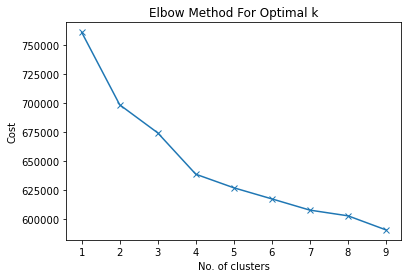

In [21]:
# import necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline


# screen plot or elbow curve to find the optimal K value

cost = []
K = range(1,10)  # max K values to iterate through
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode.fit_predict(X)  # fit the model 
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
# elbow at 6, lets consider 2 clusters
# building the model with 2 clusters

kmode = KModes(n_clusters=2, init = "Cao", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5159, cost: 698424.0


array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [23]:
# add this column back to the original dataframe
df_returns_filtered['Cluster']= clusters.tolist()
df_returns_filtered

C:\Users\Pragesh.govender\AppData\Local\Temp\ipykernel_1176\1861669587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_returns_filtered['Cluster']= clusters.tolist()


,Name 1,Description,Material,Volume,City,RSM,SFG,StreamDescription,StockParetoABC,ProductSalesCategory,FamilyHierarchyL3,Cluster
0,Game Canal Walk G060(Century),Short delivered by driver,OCC000001-0005,15.0,Milnerton,50003670 - Gerrie Stemmet,OCC000001,White Manufacture,B,SPECIALITY,Plascon One Coat,0
1,Game Canal Walk G060(Century),Short delivered by driver,GTC000001-0005,20.0,Milnerton,50003670 - Gerrie Stemmet,FXA000294,Enamel Blend Manufacture,C,MID-TIER,True Colour Bright Gloss White,1
...,...,...,...,...,...,...,...,...,...,...,...,...
108280,Game Mthatha - G085,Customer Error/over stock/not required,BBO000605-0020,80.0,Mthatha,50003670 - Gerrie Stemmet,BBO000605,Colour Manufacture,A,PREMIUM,Micatex STD Colour,0
108281,H & F Hardware,Short delivered by driver,TLS001000-0020,20.0,Piet Retief,50003750 - Ettiene Pieters,FXA001106,White Manufacture,A,PREMIUM,Professional Superior Low Sheen Tint Bas,0


In [24]:
# download to Excel
# determining the name of the file
file_name = 'Clusters.xlsx'
  
# saving the excel
df_returns_filtered.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Step 5: Model Evaluation

In [25]:
# count the number of entries in each cluster
df_returns_cluster_count = df_returns_filtered.groupby(['Cluster'])[["Cluster"]].count()
df_returns_cluster_count

,Cluster
Cluster,
0,67642
1,32000


In [101]:
# filter customers to top 10 to reduce the graph overload
import seaborn as sns
import matplotlib.pyplot as plt
# filter each clusters data separately
df_cluster0data = df_returns_filtered[df_returns_filtered['Cluster'] == 0]
df_cluster1data = df_returns_filtered[df_returns_filtered['Cluster'] == 1]

# filter to find top customers in each group
df0 = df_cluster0data.groupby(['Name 1']).Cluster.value_counts().nlargest(20)
df1 = df_cluster1data.groupby(['Name 1']).Cluster.value_counts().nlargest(20)



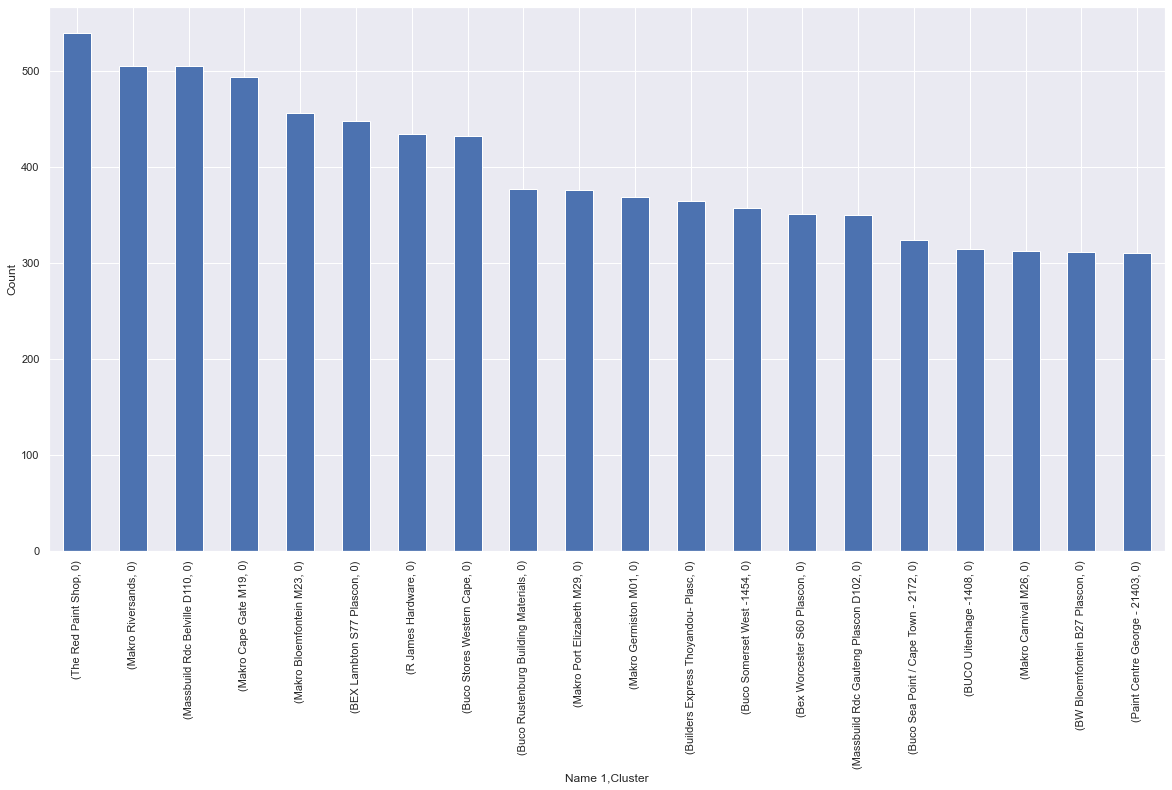

In [102]:
# Customer (Name 1) - cluster 0
import seaborn as sns
import matplotlib.pyplot as plt

# plot the groupby result
ax = df0.plot.bar(figsize=(20, 10), ylabel='Count')
plt.show()

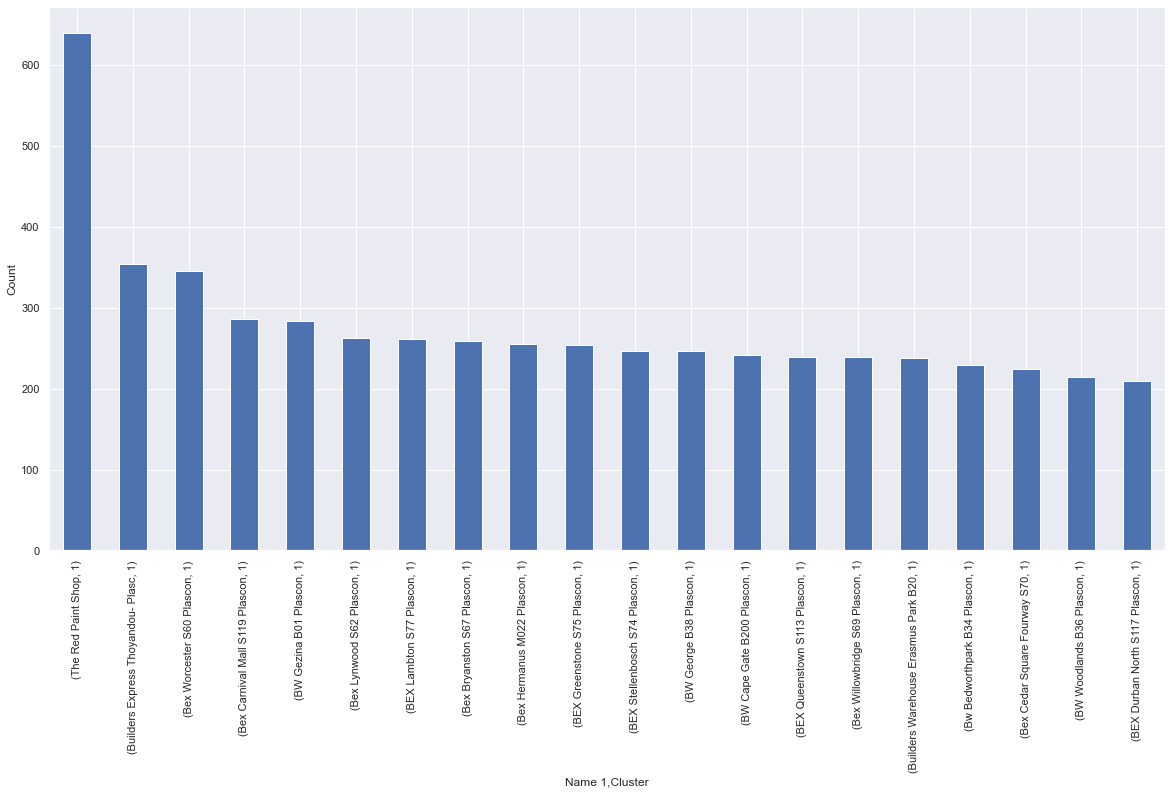

In [103]:
# Customer (Name 1) - cluster 1
import seaborn as sns
import matplotlib.pyplot as plt

# plot the groupby result
ax = df1.plot.bar(figsize=(20, 10), ylabel='Count')
plt.show()

In [29]:
# filter to find top description in each group
df0_desc = df_cluster0data.groupby(['Description']).Cluster.value_counts().nlargest(10)
df1_desc = df_cluster1data.groupby(['Description']).Cluster.value_counts().nlargest(10)


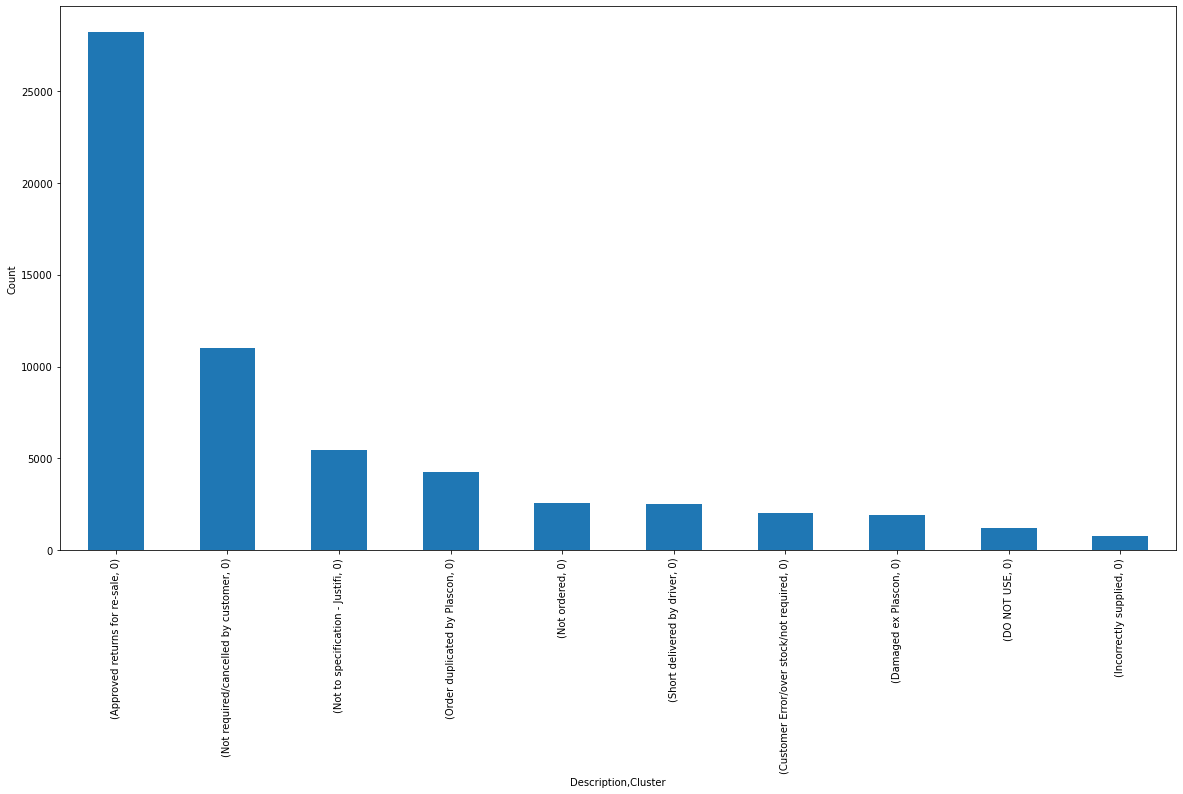

In [30]:
# Description - cluster 0
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df0_desc.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

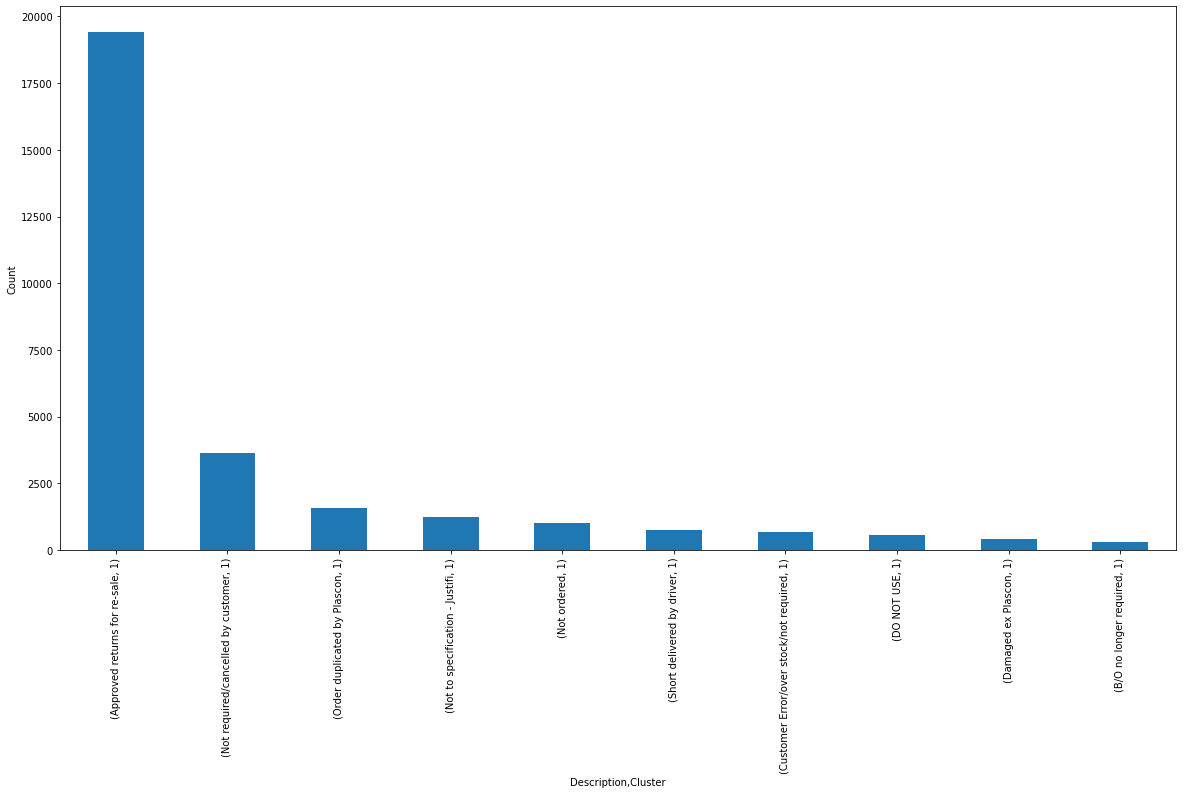

In [31]:
# Description - cluster 1
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df1_desc.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

In [32]:
# filter to find top products in each cluster
df0_Mat = df_cluster0data.groupby(['Material']).Cluster.value_counts().nlargest(10)
df1_Mat = df_cluster1data.groupby(['Material']).Cluster.value_counts().nlargest(10)


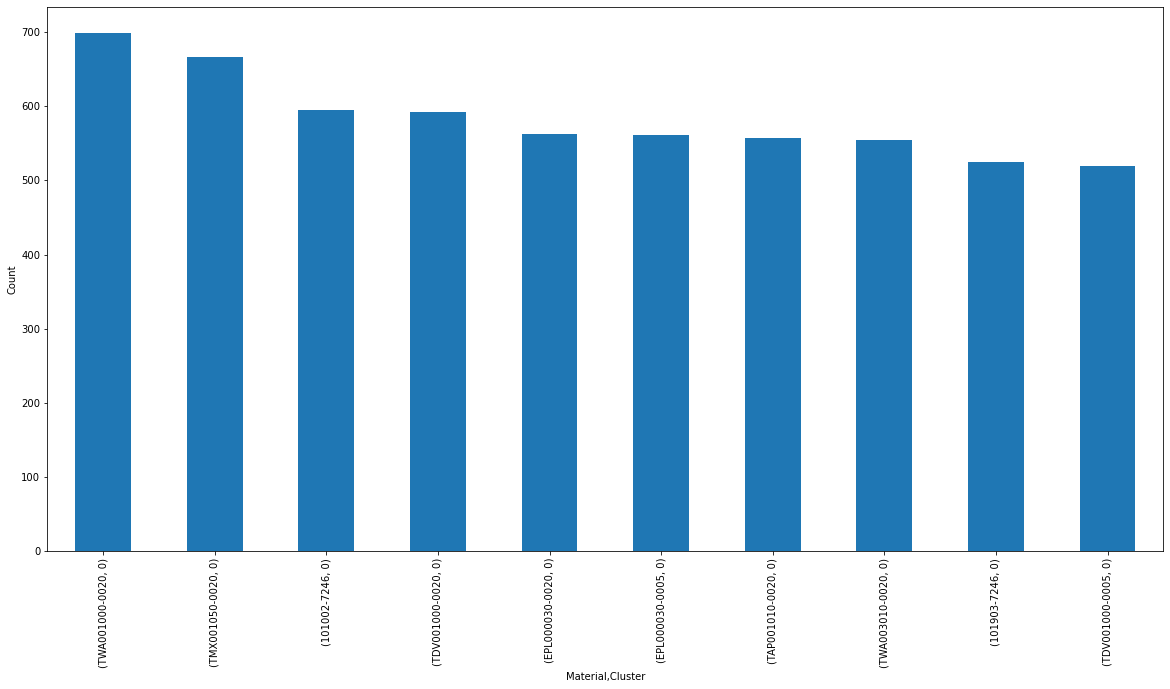

In [33]:
# Material - cluster 0
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df0_Mat.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

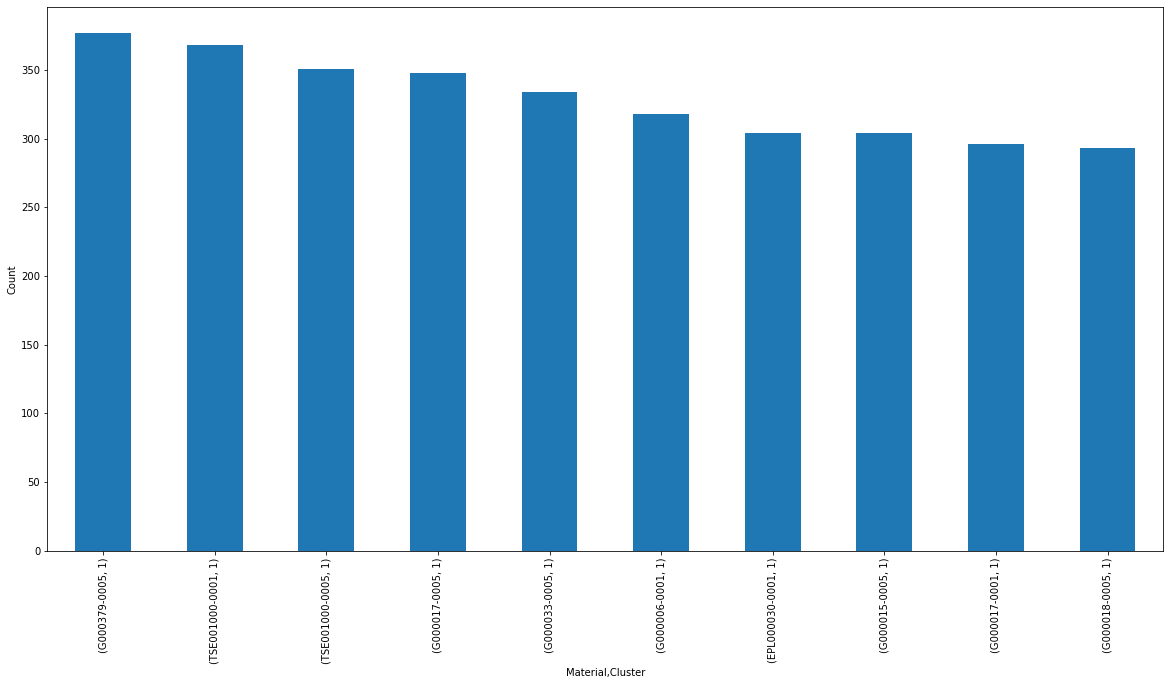

In [34]:
# Material - cluster 1
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df1_Mat.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

In [35]:
# filter to find top pack sizes
df0_Pack = df_cluster0data.groupby(['Volume']).Cluster.value_counts().nlargest(10)
df1_Pack = df_cluster1data.groupby(['Volume']).Cluster.value_counts().nlargest(10)


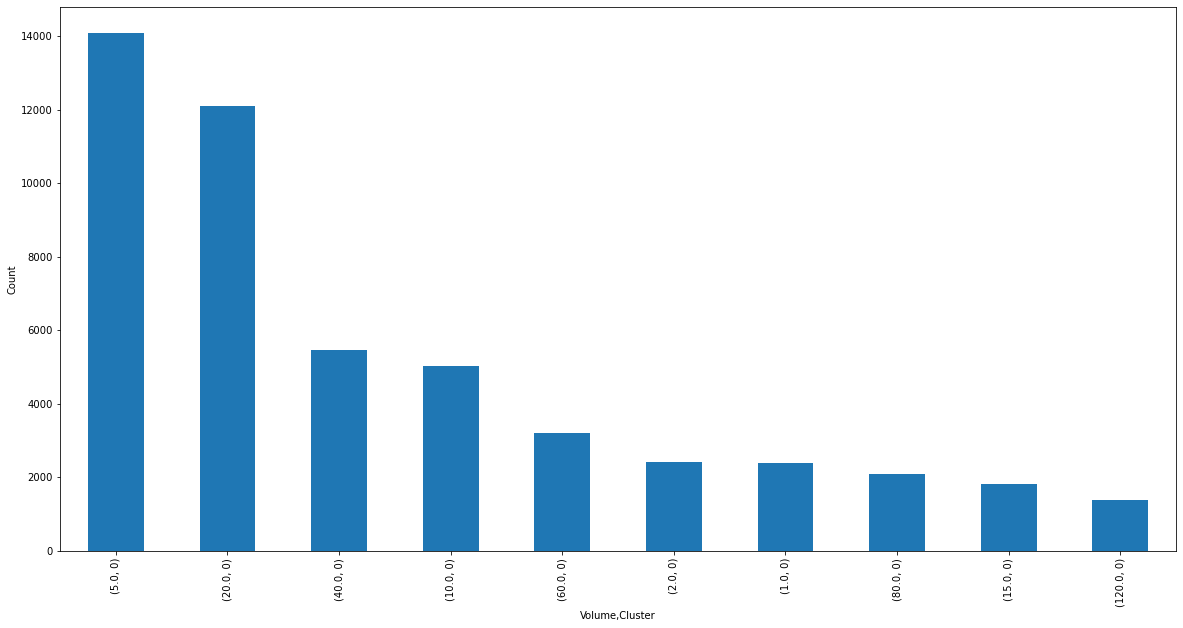

In [36]:
# Volume - cluster 0
import seaborn as sns
import matplotlib.pyplot as plt


# count plot on two categorical variable
ax = df0_Pack.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

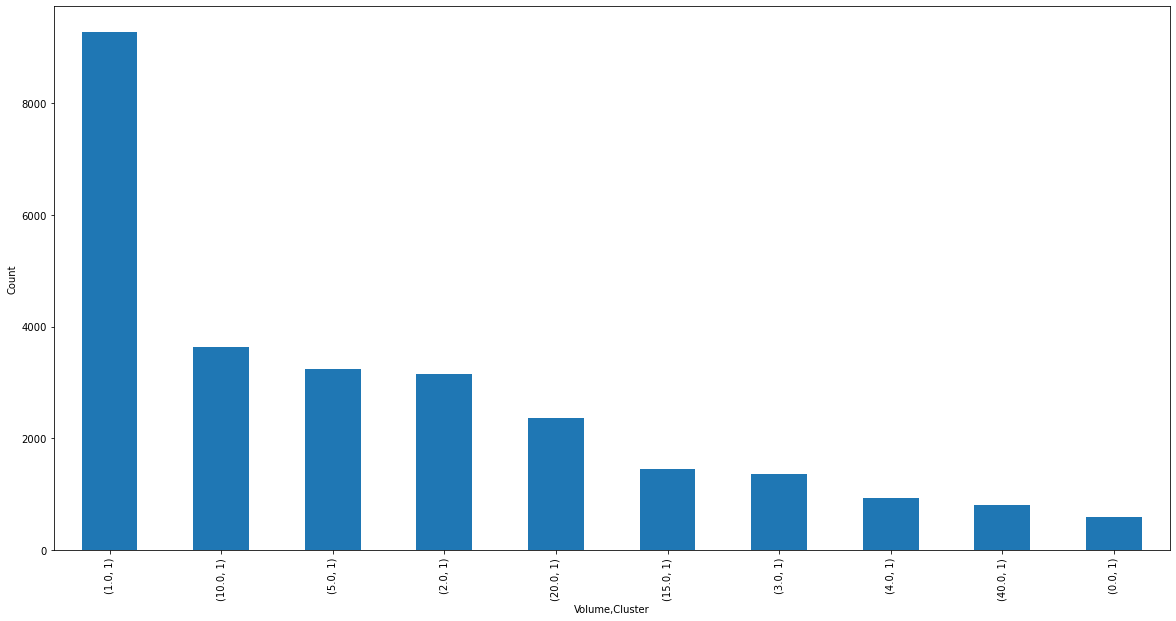

In [37]:
# Volume - cluster 1
import seaborn as sns
import matplotlib.pyplot as plt


# count plot on two categorical variable
ax = df1_Pack.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

In [38]:
# filter to find top cities
df0_City = df_cluster0data.groupby(['City']).Cluster.value_counts().nlargest(10)
df1_City = df_cluster1data.groupby(['City']).Cluster.value_counts().nlargest(10)


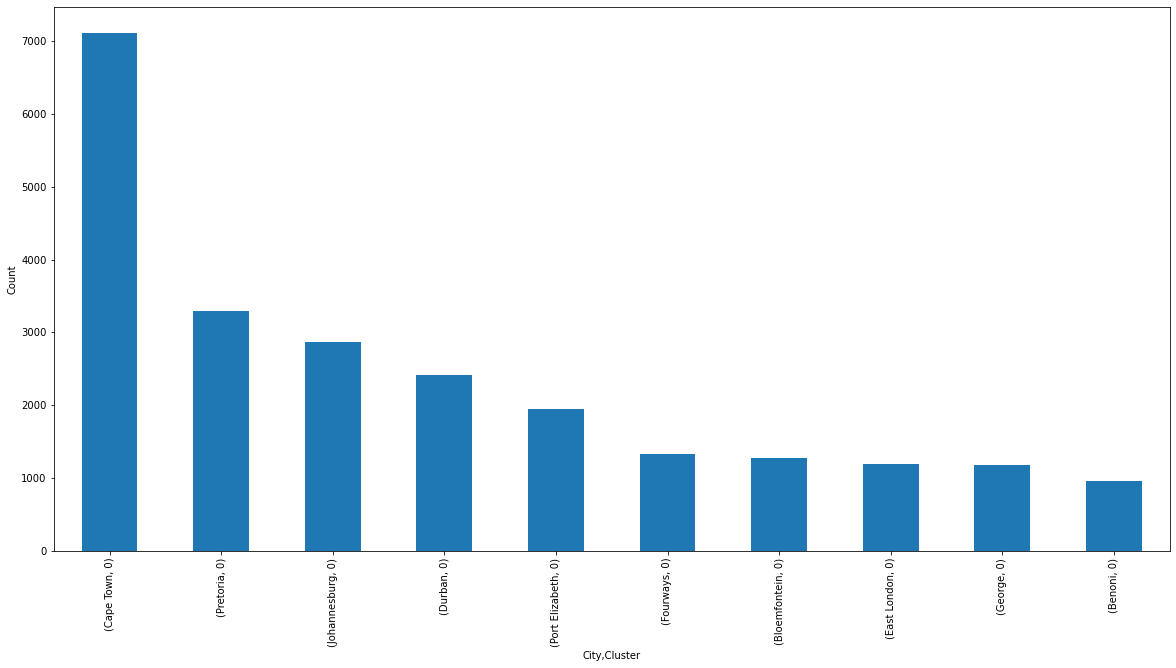

In [39]:
# City - cluster 0
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df0_City.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

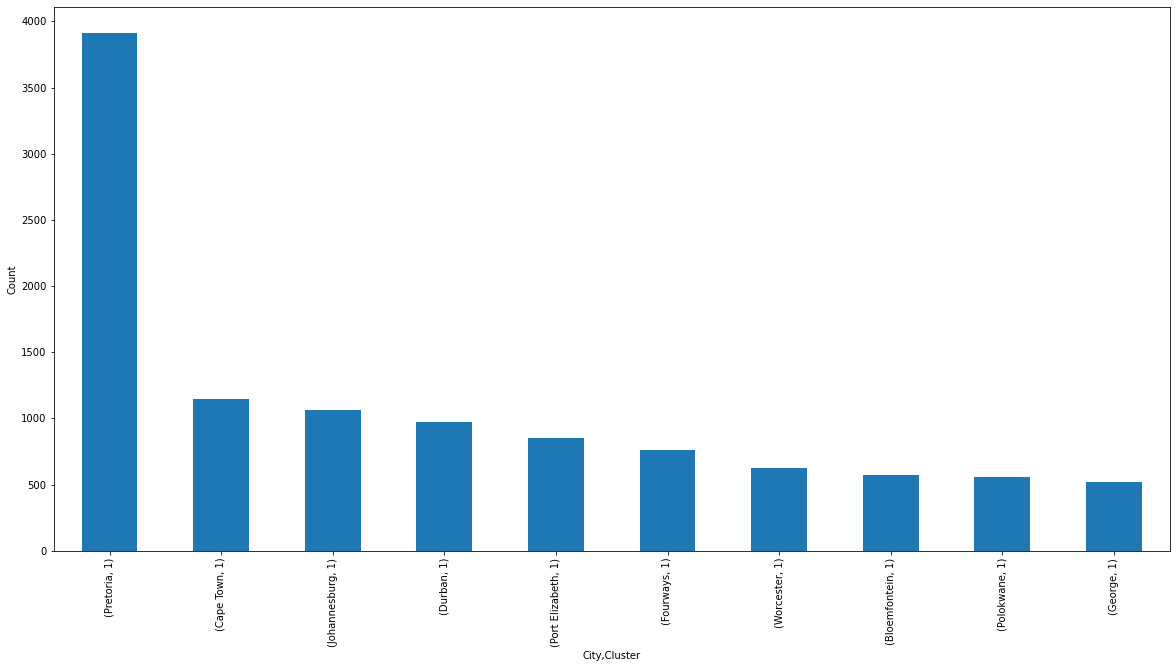

In [40]:
# City - cluster 1
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df1_City.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

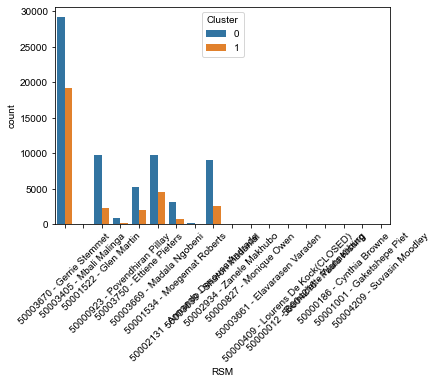

In [41]:
# RSM
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
sns.countplot(x ='RSM', hue = "Cluster", data = df_returns_filtered)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(50,5)})
# Show the plot
plt.show()

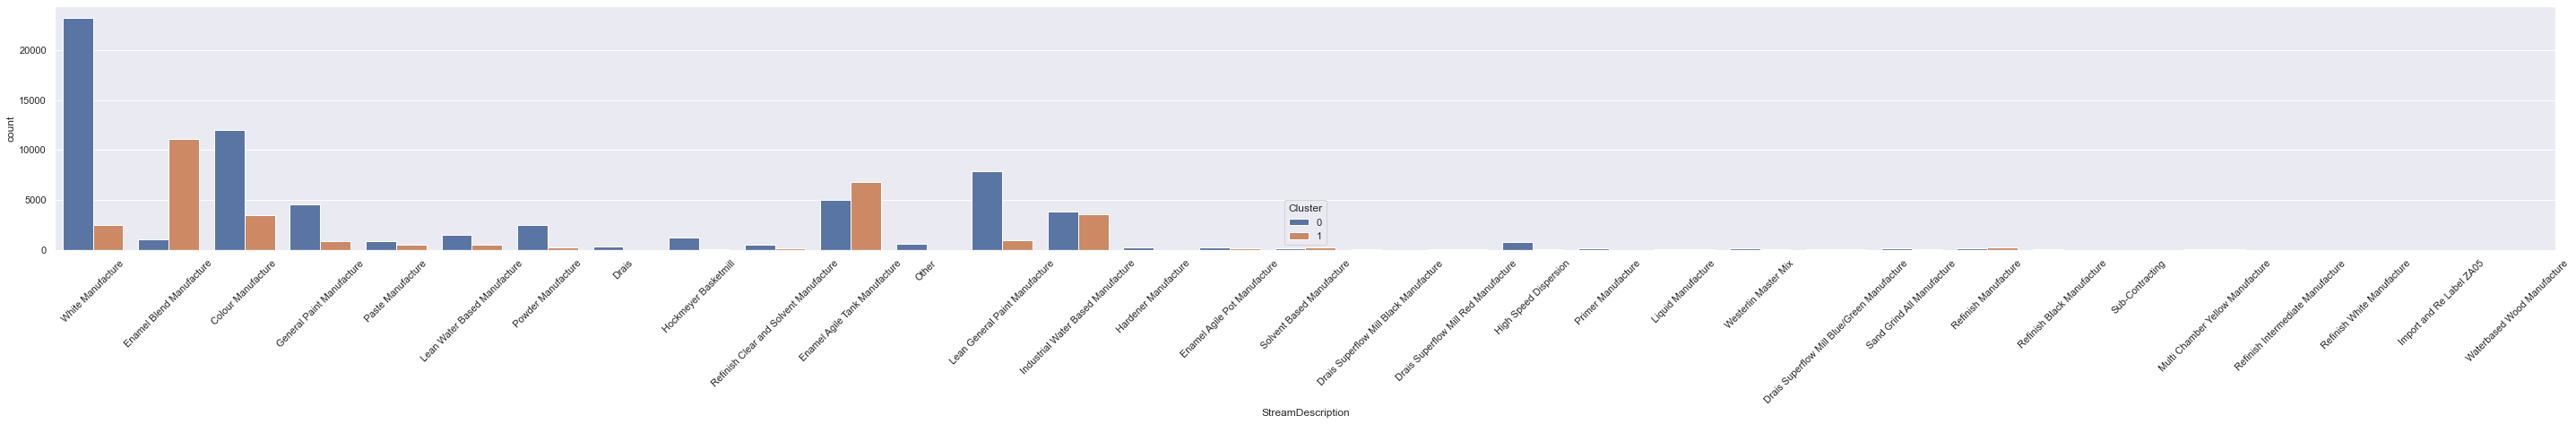

In [42]:
# Stream Description
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
sns.countplot(x ='StreamDescription', hue = "Cluster", data = df_returns_filtered)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(40,5)})
# Show the plot
plt.show()

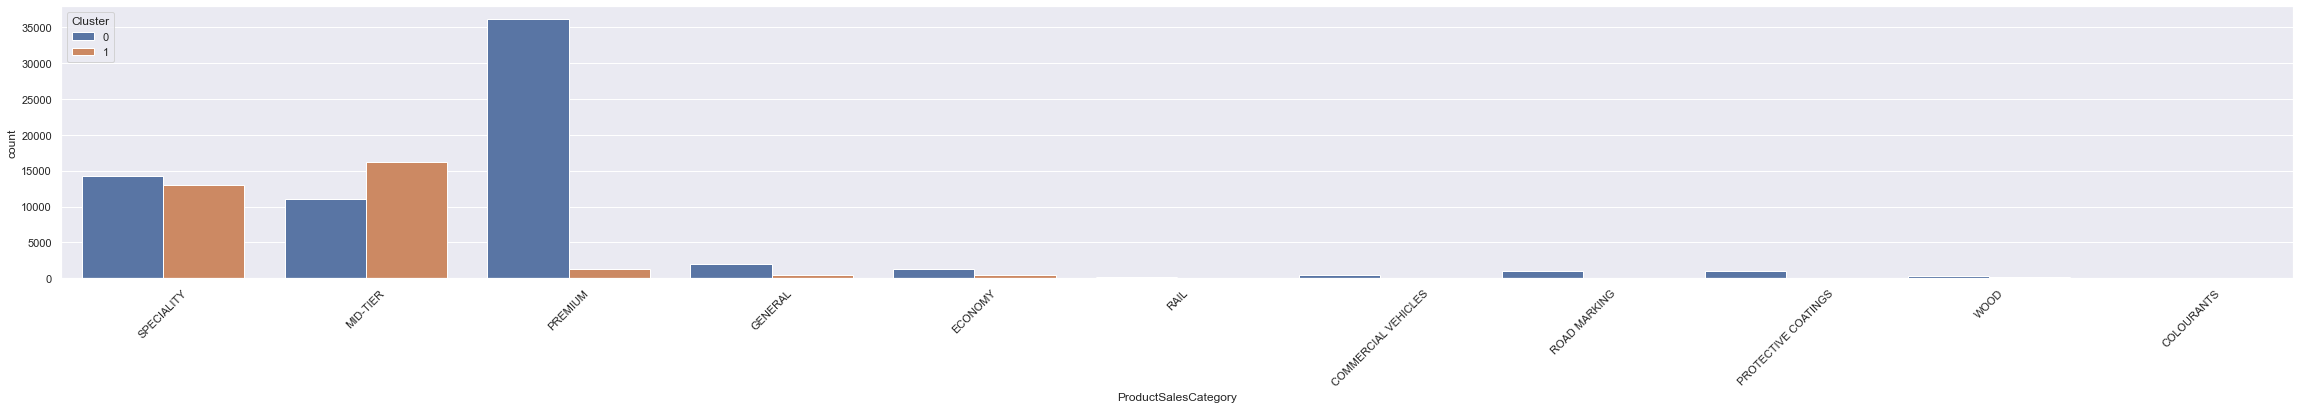

In [43]:
# ProductSalesCategory
import seaborn as sns
import matplotlib.pyplot as plt


# count plot on two categorical variable
sns.countplot(x ='ProductSalesCategory', hue = "Cluster", data = df_returns_filtered)
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [44]:
# filter to find top familyhierarchyL3
df0_Hier = df_cluster0data.groupby(['FamilyHierarchyL3']).Cluster.value_counts().nlargest(10)
df1_Hier = df_cluster1data.groupby(['FamilyHierarchyL3']).Cluster.value_counts().nlargest(10)


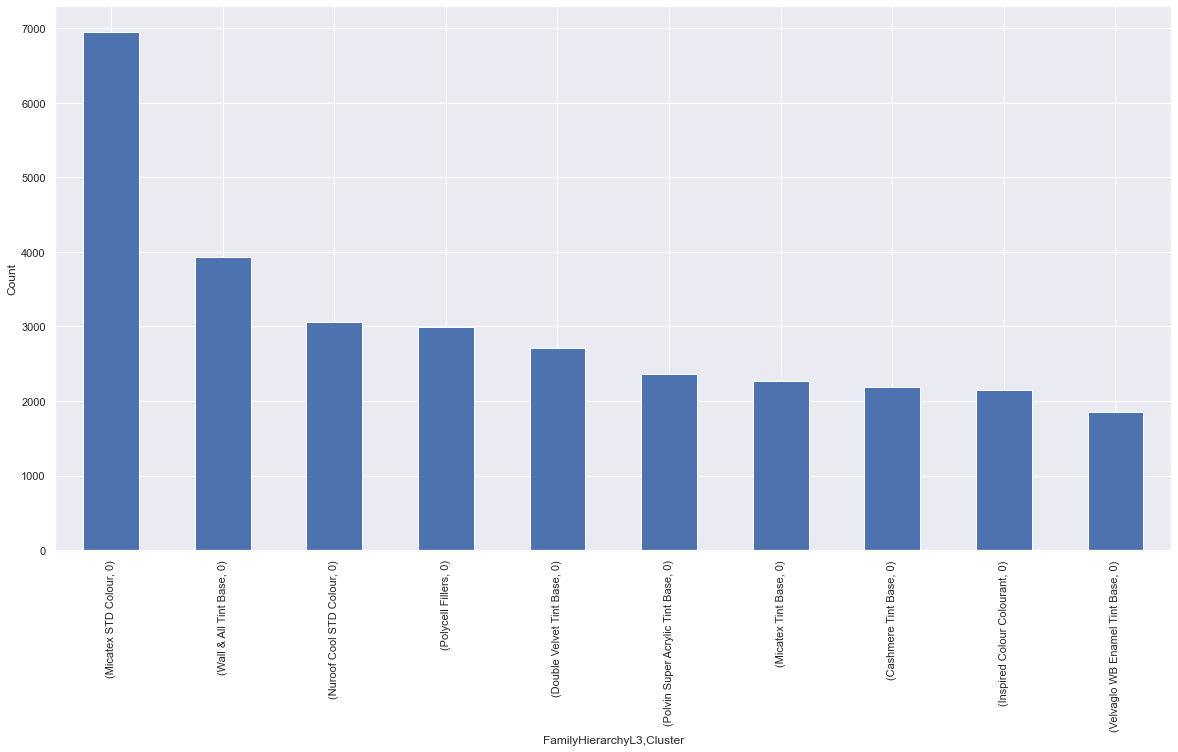

In [45]:
#FamilyHierarchyL3 - cluster 0
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df0_Hier.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

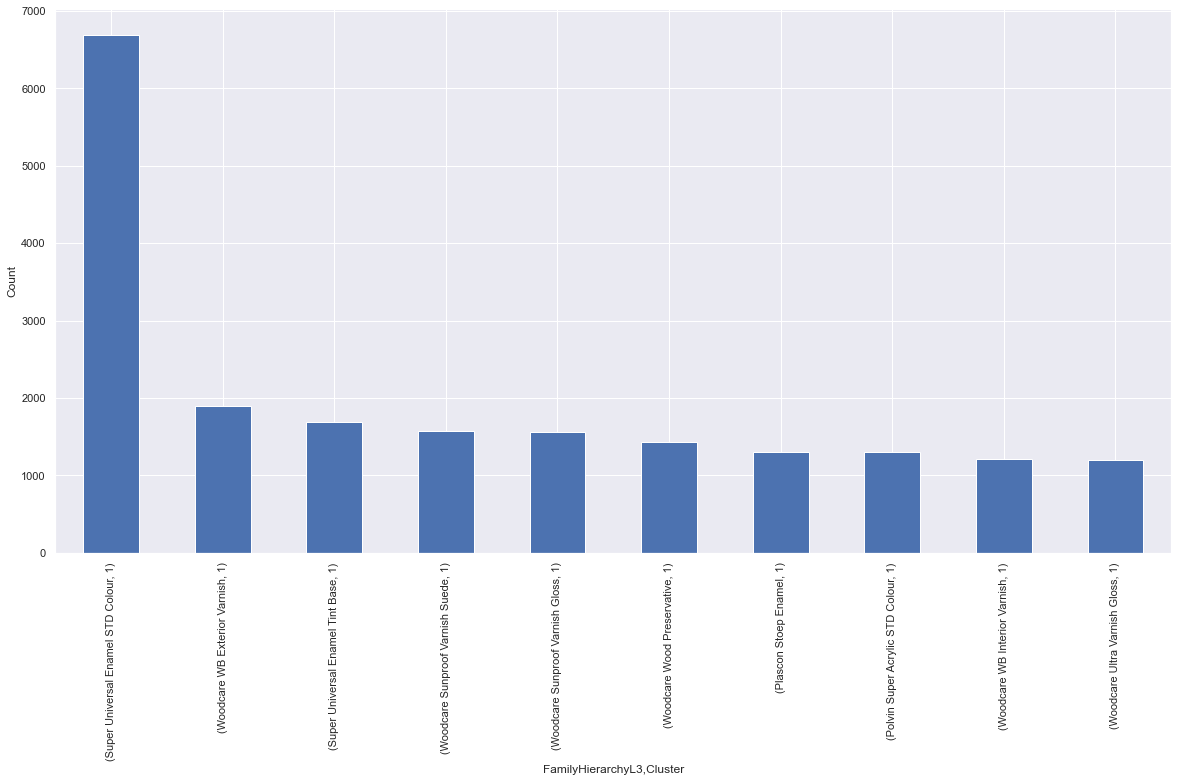

In [46]:
#FamilyHierarchyL3 - cluster 1
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df1_Hier.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

In [47]:
# filter to find top SFG
df0_SFG = df_cluster0data.groupby(['SFG']).Cluster.value_counts().nlargest(10)
df1_SFG = df_cluster1data.groupby(['SFG']).Cluster.value_counts().nlargest(10)


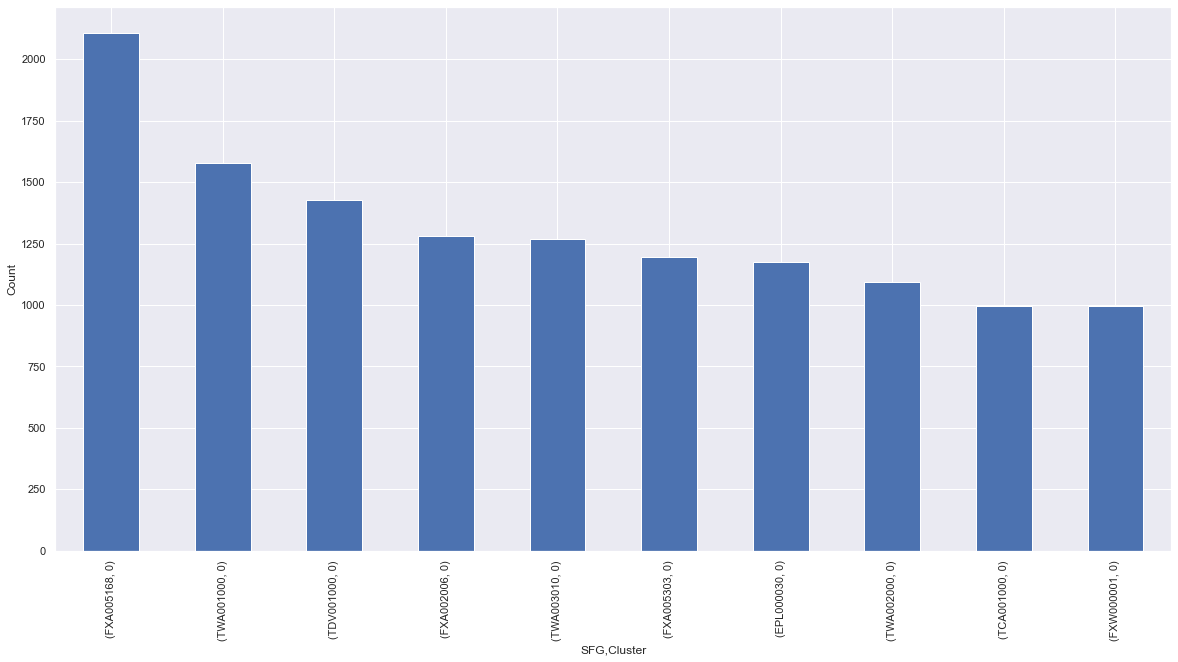

In [48]:
#SFG- cluster 0
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df0_SFG.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

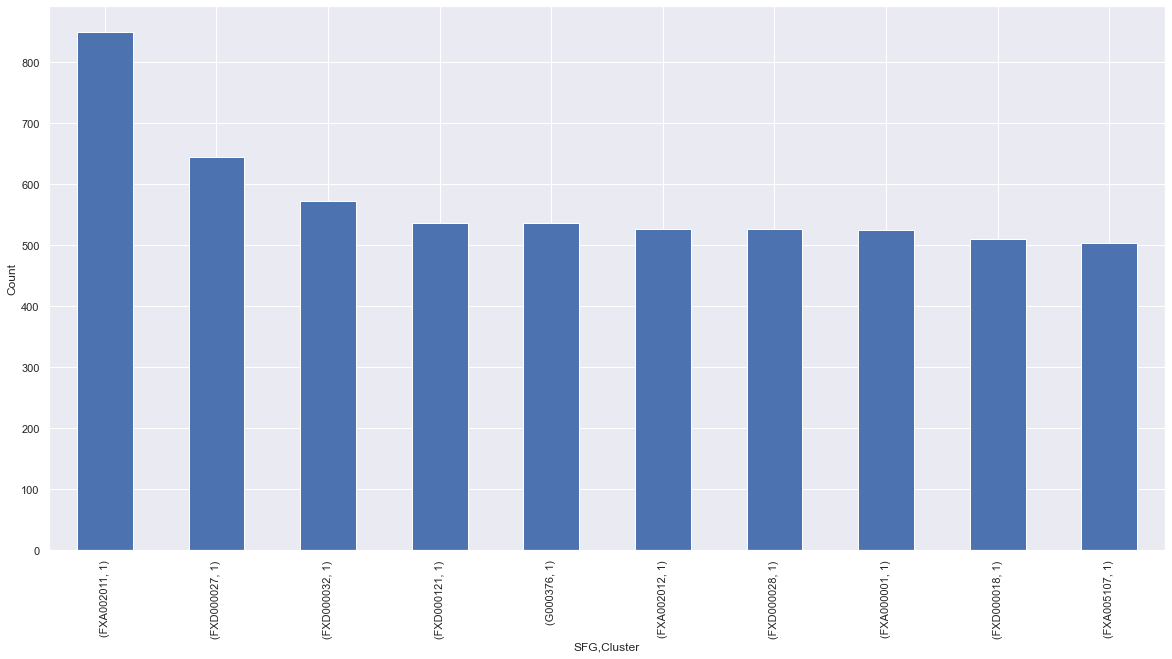

In [49]:
#SFG- cluster 1
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on two categorical variable
ax = df1_SFG.plot.bar(figsize=(20, 10), ylabel='Count')
 
# Show the plot
plt.show()

In [50]:
# lets dig deeper

## Cluster 1

In [100]:
# Investigate Cluster 1 Red Paint shop issues
df_Red= df_cluster0data[df_cluster0data['Name 1'] == 'The Red Paint Shop']


df_subset_Red= df_Red.groupby(['Name 1', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)

df_subset_Red['%'] =(df_subset_Red['Material']/(df_subset_Red['Material'].sum()))*100
# sort in ascending
df_subset_Red= df_subset_Red.sort_values('%',ascending=False)
df_subset_Red

,Name 1,Description,Material,%
16,The Red Paint Shop,Not required/cancelled by customer,130,24.074074
20,The Red Paint Shop,Not to specification - Justifi,120,22.222222
4,The Red Paint Shop,DO NOT USE,57,10.555556
15,The Red Paint Shop,Not ordered,47,8.703704
21,The Red Paint Shop,Order duplicated by Plascon,44,8.148148
3,The Red Paint Shop,Customer Error/over stock/not required,44,8.148148
7,The Red Paint Shop,Export - Product expired,20,3.703704
14,The Red Paint Shop,Incorrectly supplied,15,2.777778
19,The Red Paint Shop,Not to Spec: Colour,15,2.777778
5,The Red Paint Shop,Damaged ex Plascon,7,1.296296


In [59]:
# Investigate Cluster 1 Makro Riversands issues
df_MakroR= df_cluster0data[df_cluster0data['Name 1'] == 'Makro Riversands']


df_subset_MakroR= df_MakroR.groupby(['Name 1', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',40)

df_subset_MakroR['%'] =(df_subset_MakroR['Material']/(df_subset_MakroR['Material'].sum()))*100
# sort in ascending
df_subset_MakroR= df_subset_MakroR.sort_values('%',ascending=False)
df_subset_MakroR

,Name 1,Description,Material,%
0,Makro Riversands,Approved returns for re-sale,478,94.466403
3,Makro Riversands,No invoice attached,6,1.185771
4,Makro Riversands,Not ordered,6,1.185771
1,Makro Riversands,DO NOT USE,5,0.988142
2,Makro Riversands,Faulty bar codes,5,0.988142
5,Makro Riversands,Not to specification - Justifi,2,0.395257
6,Makro Riversands,Order duplicated by Plascon,1,0.197628
7,Makro Riversands,Over stock,1,0.197628
8,Makro Riversands,Short delivered by driver,1,0.197628
9,Makro Riversands,Vehicle Hijacked,1,0.197628


In [60]:
# Investigate Cluster 1 Massbuild issues
df_Mass= df_cluster0data[df_cluster0data['Name 1'] == 'Massbuild Rdc Belville D110']


df_subset_Mass= df_Mass.groupby(['Name 1', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_Mass['%'] =(df_subset_Mass['Material']/(df_subset_Mass['Material'].sum()))*100
# sort in ascending
df_subset_Mass= df_subset_Mass.sort_values('%',ascending=False)
df_subset_Mass

,Name 1,Description,Material,%
15,Massbuild Rdc Belville D110,Not required/cancelled by customer,235,46.442688
19,Massbuild Rdc Belville D110,Short delivered by driver,99,19.565217
4,Massbuild Rdc Belville D110,Damaged ex Plascon,41,8.102767
7,Massbuild Rdc Belville D110,Faulty bar codes,31,6.126482
5,Massbuild Rdc Belville D110,Damaged in transit,20,3.952569
...,...,...,...,...
11,Massbuild Rdc Belville D110,Incorrect quantity invoiced,1,0.197628
12,Massbuild Rdc Belville D110,Incorrectly Supplied - Depot,1,0.197628
6,Massbuild Rdc Belville D110,EXPORT – Short delivered by WHouse/Store,1,0.197628
17,Massbuild Rdc Belville D110,Other - with compulsory Free Text,1,0.197628


In [61]:
# Investigate Cluster 1 Makro Cape Gate Issues
df_MakroCape= df_cluster0data[df_cluster0data['Name 1'] == 'Makro Cape Gate M19']


df_subset_MakroCape= df_MakroCape.groupby(['Name 1','StreamDescription','SFG', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_MakroCape['%'] =(df_subset_MakroCape['Material']/(df_subset_MakroCape['Material'].sum()))*100
# sort in ascending
df_subset_MakroCape= df_subset_MakroCape.sort_values('%',ascending=False)
df_subset_MakroCape

,Name 1,StreamDescription,SFG,Description,Material,%
163,Makro Cape Gate M19,White Manufacture,TTS003000,Approved returns for re-sale,13,2.631579
53,Makro Cape Gate M19,Enamel Agile Tank Manufacture,FXP000002,Approved returns for re-sale,12,2.429150
170,Makro Cape Gate M19,White Manufacture,TWA001000,Approved returns for re-sale,12,2.429150
84,Makro Cape Gate M19,General Paint Manufacture,WUP000001,Approved returns for re-sale,11,2.226721
157,Makro Cape Gate M19,White Manufacture,TMX003050,Approved returns for re-sale,11,2.226721
...,...,...,...,...,...,...
94,Makro Cape Gate M19,Industrial Water Based Manufacture,WAA000057,Approved returns for re-sale,1,0.202429
89,Makro Cape Gate M19,Hockmeyer Basketmill,PI2-HOC,Approved returns for re-sale,1,0.202429
87,Makro Cape Gate M19,Hockmeyer Basketmill,PB2-HOC,Not required/cancelled by customer,1,0.202429
86,Makro Cape Gate M19,Hockmeyer Basketmill,PB2-HOC,B/O no longer required,1,0.202429


In [87]:
# Investigate Cluster 1 Premium sales category
df_Premium= df_cluster0data[df_cluster0data['ProductSalesCategory'] == 'PREMIUM']


df_subset_Premium= df_Premium.groupby(['ProductSalesCategory','StreamDescription', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_Premium['%'] =(df_subset_Premium['Material']/(df_subset_Premium['Material'].sum()))*100
# sort in ascending
df_subset_Premium= df_subset_Premium.sort_values('%',ascending=False)
df_subset_Premium

,ProductSalesCategory,StreamDescription,Description,Material,%
215,PREMIUM,White Manufacture,Approved returns for re-sale,7282,20.162809
1,PREMIUM,Colour Manufacture,Approved returns for re-sale,6355,17.596079
254,PREMIUM,White Manufacture,Not to specification - Justifi,2378,6.584339
249,PREMIUM,White Manufacture,Not required/cancelled by customer,2148,5.947502
152,PREMIUM,Lean General Paint Manufacture,Approved returns for re-sale,1996,5.526636
...,...,...,...,...,...
97,PREMIUM,General Paint Manufacture,Incorrectly tinted by Partner,1,0.002769
167,PREMIUM,Lean General Paint Manufacture,Free Sample Issued,1,0.002769
36,PREMIUM,Colour Manufacture,Not to Spec: Viscosity,1,0.002769
235,PREMIUM,White Manufacture,Incorrect price - system error,1,0.002769


In [88]:
# Investigate Cluster 1 Micatex STD color
df_L3= df_cluster0data[df_cluster0data['FamilyHierarchyL3'] == 'Micatex STD Colour']


df_subset_L3= df_L3.groupby(['FamilyHierarchyL3', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_L3['%'] =(df_subset_L3['Material']/(df_subset_L3['Material'].sum()))*100
# sort in ascending
df_subset_L3= df_subset_L3.sort_values('%',ascending=False)
df_subset_L3

,FamilyHierarchyL3,Description,Material,%
1,Micatex STD Colour,Approved returns for re-sale,4068,58.540797
31,Micatex STD Colour,Not required/cancelled by customer,1145,16.477191
36,Micatex STD Colour,Order duplicated by Plascon,255,3.669593
30,Micatex STD Colour,Not ordered,245,3.525687
39,Micatex STD Colour,Short delivered by driver,228,3.281048
...,...,...,...,...
23,Micatex STD Colour,Incorrectly delivered by driver,1,0.014391
20,Micatex STD Colour,Incorrect price - system error,1,0.014391
40,Micatex STD Colour,Sub-standard packaging,1,0.014391
41,Micatex STD Colour,Under/over filling,1,0.014391


In [67]:
# Investigate Cluster 1 white stream issues
df_White= df_cluster0data[df_cluster0data['StreamDescription'] == 'White Manufacture']


df_subset_White= df_White.groupby(['StreamDescription', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_White['%'] =(df_subset_White['Material']/(df_subset_White['Material'].sum()))*100
# sort in ascending
df_subset_White= df_subset_White.sort_values('%',ascending=False)
df_subset_White

,StreamDescription,Description,Material,%
1,White Manufacture,Approved returns for re-sale,9203,39.645888
41,White Manufacture,Not to specification - Justifi,3376,14.543575
36,White Manufacture,Not required/cancelled by customer,3233,13.927541
42,White Manufacture,Order duplicated by Plascon,1331,5.733856
45,White Manufacture,Short delivered by driver,855,3.683281
...,...,...,...,...
25,White Manufacture,Incorrectly Supplied - Depot,2,0.008616
0,White Manufacture,Aerosols - Faulty,2,0.008616
21,White Manufacture,Incorrect price - system error,1,0.004308
49,White Manufacture,Withdrawn to dump,1,0.004308


In [69]:
# Investigate Cluster 1 5L issues
df_5= df_cluster0data[df_cluster0data['Volume'] == 5]


df_subset_5= df_5.groupby(['Volume', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)

df_subset_5['%'] =(df_subset_5['Material']/(df_subset_5['Material'].sum()))*100
# sort in ascending
df_subset_5= df_subset_5.sort_values('%',ascending=False)
df_subset_5

,Volume,Description,Material,%
1,5.0,Approved returns for re-sale,8248,58.533816
39,5.0,Not to specification - Justifi,1463,10.382514
34,5.0,Not required/cancelled by customer,1208,8.572848
8,5.0,Damaged ex Plascon,455,3.229011
43,5.0,Short delivered by driver,450,3.193528
40,5.0,Order duplicated by Plascon,280,1.987084
33,5.0,Not ordered,280,1.987084
7,5.0,DO NOT USE,209,1.483216
6,5.0,Customer Error/over stock/not required,205,1.454829
37,5.0,Not to Spec: Colour,121,0.858704


In [71]:
# Investigate Cluster 1 20L issues
df_20= df_cluster0data[df_cluster0data['Volume'] == 20]


df_subset_20= df_20.groupby(['Volume', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)

df_subset_20['%'] =(df_subset_20['Material']/(df_subset_20['Material'].sum()))*100
# sort in ascending
df_subset_20= df_subset_20.sort_values('%',ascending=False)
df_subset_20

,Volume,Description,Material,%
1,20.0,Approved returns for re-sale,5429,44.856647
37,20.0,Not required/cancelled by customer,1556,12.856317
42,20.0,Not to specification - Justifi,1418,11.716103
46,20.0,Short delivered by driver,503,4.155994
9,20.0,Damaged ex Plascon,447,3.693299
43,20.0,Order duplicated by Plascon,420,3.470214
6,20.0,Customer Error/over stock/not required,309,2.553086
36,20.0,Not ordered,293,2.420887
8,20.0,DO NOT USE,212,1.751632
30,20.0,Incorrectly supplied,130,1.074114


## Cluster 2

In [91]:
# Investigate Cluster 2 The Red Paint Shop 
df_RedPaintShop= df_cluster1data[df_cluster1data['Name 1'] == 'The Red Paint Shop']


df_subset_RedPaintShop= df_RedPaintShop.groupby(['Name 1', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)

df_subset_RedPaintShop['%'] =(df_subset_RedPaintShop['Material']/(df_subset_RedPaintShop['Material'].sum()))*100
# sort in ascending
df_subset_RedPaintShop= df_subset_RedPaintShop.sort_values('%',ascending=False)
df_subset_RedPaintShop

,Name 1,Description,Material,%
14,The Red Paint Shop,Not required/cancelled by customer,154,24.06250
19,The Red Paint Shop,Not to specification - Justifi,103,16.09375
13,The Red Paint Shop,Not ordered,69,10.78125
3,The Red Paint Shop,DO NOT USE,66,10.31250
2,The Red Paint Shop,Customer Error/over stock/not required,62,9.68750
6,The Red Paint Shop,Export - Product expired,53,8.28125
0,The Red Paint Shop,Approved returns for re-sale,34,5.31250
20,The Red Paint Shop,Order duplicated by Plascon,28,4.37500
7,The Red Paint Shop,Faulty bar codes,13,2.03125
17,The Red Paint Shop,Not to Spec: Colour,13,2.03125


In [ ]:
# Investigate Cluster 2 The Red Paint Shop 
df_RedPaintShop= df_cluster1data[df_cluster1data['Name 1'] == 'The Red Paint Shop']


df_subset_RedPaintShop= df_RedPaintShop.groupby(['Name 1', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)

df_subset_RedPaintShop['%'] =(df_subset_RedPaintShop['Material']/(df_subset_RedPaintShop['Material'].sum()))*100
# sort in ascending
df_subset_RedPaintShop= df_subset_RedPaintShop.sort_values('%',ascending=False)
df_subset_RedPaintShop

In [97]:
# Investigate Cluster 2 Mid Tier Sales Category
df_MidTier= df_cluster1data[df_cluster1data['ProductSalesCategory'] == 'MID-TIER']


df_subset_MidTier= df_MidTier.groupby(['ProductSalesCategory','StreamDescription', 'Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_MidTier['%'] =(df_subset_MidTier['Material']/(df_subset_MidTier['Material'].sum()))*100
# sort in ascending
df_subset_MidTier= df_subset_MidTier.sort_values('%',ascending=False)
df_subset_MidTier

,ProductSalesCategory,StreamDescription,Description,Material,%
54,MID-TIER,Enamel Blend Manufacture,Approved returns for re-sale,6288,38.697766
1,MID-TIER,Colour Manufacture,Approved returns for re-sale,1580,9.723675
88,MID-TIER,Enamel Blend Manufacture,Not required/cancelled by customer,918,5.649578
198,MID-TIER,White Manufacture,Approved returns for re-sale,688,4.234107
93,MID-TIER,Enamel Blend Manufacture,Order duplicated by Plascon,513,3.157117
...,...,...,...,...,...
158,MID-TIER,Lean General Paint Manufacture,Over stock,1,0.006154
56,MID-TIER,Enamel Blend Manufacture,Bought out adjustments,1,0.006154
136,MID-TIER,General Paint Manufacture,Wrong order number,1,0.006154
51,MID-TIER,Enamel Agile Tank Manufacture,Not to specification - Justifi,1,0.006154


In [98]:
# Investigate Cluster 2 Super Enamel STD Color
df_SuperEnamel= df_cluster1data[df_cluster1data['FamilyHierarchyL3'] == 'Super Universal Enamel STD Colour']


df_subset_SuperEnamel= df_SuperEnamel.groupby(['FamilyHierarchyL3','Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)

df_subset_SuperEnamel['%'] =(df_subset_SuperEnamel['Material']/(df_subset_SuperEnamel['Material'].sum()))*100
# sort in ascending
df_subset_SuperEnamel= df_subset_SuperEnamel.sort_values('%',ascending=False)
df_subset_SuperEnamel

,FamilyHierarchyL3,Description,Material,%
1,Super Universal Enamel STD Colour,Approved returns for re-sale,5224,78.110048
30,Super Universal Enamel STD Colour,Not required/cancelled by customer,435,6.504187
35,Super Universal Enamel STD Colour,Order duplicated by Plascon,232,3.468900
29,Super Universal Enamel STD Colour,Not ordered,134,2.003589
38,Super Universal Enamel STD Colour,Short delivered by driver,112,1.674641
7,Super Universal Enamel STD Colour,DO NOT USE,72,1.076555
34,Super Universal Enamel STD Colour,Not to specification - Justifi,59,0.882177
8,Super Universal Enamel STD Colour,Damaged ex Plascon,50,0.747608
6,Super Universal Enamel STD Colour,Customer Error/over stock/not required,41,0.613038
24,Super Universal Enamel STD Colour,Incorrectly supplied,40,0.598086


In [75]:
# Investigate Cluster 2 Enamel Blend manufacturing
df_EnamelBlend= df_cluster1data[df_cluster1data['StreamDescription'] == 'Enamel Blend Manufacture']


df_subset_EnamelBlend= df_EnamelBlend.groupby(['StreamDescription','Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_EnamelBlend['%'] =(df_subset_EnamelBlend['Material']/(df_subset_EnamelBlend['Material'].sum()))*100
# sort in ascending
df_subset_EnamelBlend= df_subset_EnamelBlend.sort_values('%',ascending=False)
df_subset_EnamelBlend

,StreamDescription,Description,Material,%
1,Enamel Blend Manufacture,Approved returns for re-sale,7302,65.801568
35,Enamel Blend Manufacture,Not required/cancelled by customer,1084,9.768406
40,Enamel Blend Manufacture,Order duplicated by Plascon,563,5.073443
39,Enamel Blend Manufacture,Not to specification - Justifi,353,3.181040
34,Enamel Blend Manufacture,Not ordered,308,2.775525
...,...,...,...,...
17,Enamel Blend Manufacture,Hard in tin,3,0.027034
25,Enamel Blend Manufacture,Incorrectly Supplied - Depot,2,0.018023
13,Enamel Blend Manufacture,EXPORT – Short delivered by WHouse/Store,2,0.018023
24,Enamel Blend Manufacture,Incorrectly Ordered By Sales Consultant,2,0.018023


In [76]:
# Investigate Cluster 2 EPL30
df_SFG= df_cluster1data[df_cluster1data['SFG'] == 'FXA002011']


df_subset_SFG= df_SFG.groupby(['SFG','StreamDescription','Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_SFG['%'] =(df_subset_SFG['Material']/(df_subset_SFG['Material'].sum()))*100
# sort in ascending
df_subset_SFG= df_subset_SFG.sort_values('%',ascending=False)
df_subset_SFG

,SFG,StreamDescription,Description,Material,%
0,FXA002011,Enamel Blend Manufacture,Approved returns for re-sale,334,39.340400
26,FXA002011,Enamel Blend Manufacture,Not to specification - Justifi,165,19.434629
22,FXA002011,Enamel Blend Manufacture,Not required/cancelled by customer,84,9.893993
27,FXA002011,Enamel Blend Manufacture,Order duplicated by Plascon,41,4.829211
21,FXA002011,Enamel Blend Manufacture,Not ordered,37,4.358068
...,...,...,...,...,...
12,FXA002011,Enamel Blend Manufacture,High rise problems,1,0.117786
11,FXA002011,Enamel Blend Manufacture,Formulation / Tinting Machine Issue,1,0.117786
9,FXA002011,Enamel Blend Manufacture,Distribution Issues,1,0.117786
2,FXA002011,Enamel Blend Manufacture,Bought out adjustments,1,0.117786


In [80]:
# Investigate Cluster 2 20L Volumes
df_C2Volume= df_cluster1data[df_cluster1data['Volume'] == 1]


df_subset_C2Volume= df_C2Volume.groupby(['Volume','StreamDescription','Description'])[["Material"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_C2Volume['%'] =(df_subset_C2Volume['Material']/(df_subset_C2Volume['Material'].sum()))*100
# sort in ascending
df_subset_C2Volume= df_subset_C2Volume.sort_values('%',ascending=False)
df_subset_C2Volume

,Volume,StreamDescription,Description,Material,%
54,1.0,Enamel Agile Tank Manufacture,Approved returns for re-sale,2360,25.452977
165,1.0,Industrial Water Based Manufacture,Approved returns for re-sale,1715,18.496549
91,1.0,Enamel Blend Manufacture,Approved returns for re-sale,1547,16.684642
185,1.0,Lean General Paint Manufacture,Approved returns for re-sale,409,4.411130
78,1.0,Enamel Agile Tank Manufacture,Not required/cancelled by customer,193,2.081536
...,...,...,...,...,...
199,1.0,Lean General Paint Manufacture,High rise problems,1,0.010785
200,1.0,Lean General Paint Manufacture,Incorrect colour in tin,1,0.010785
201,1.0,Lean General Paint Manufacture,Incorrect customer account cha,1,0.010785
202,1.0,Lean General Paint Manufacture,Incorrectly ordered by customer,1,0.010785
